In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Undistort capured image

In [ ]:
cv2.undistort

In [41]:
def create_line(event,x,y, flags, params):
    
    points = list()
    
    if( event == cv2.EVENT_LBUTTONDOWN ):
        points.append([x,y])
        
    if len(points)%2==0:
        i = 0
        while i>=len(points)-1:
            cv2.line(img, (points[i][0],points[i][1]), (points[i+1][0], points[i+1][1]))
            i += 2

In [65]:
# Using cv2.imread() method 
img = cv2.imread("img1.jpg") 
  
# Displaying the image 

cv2.namedWindow("image")
cv2.setMouseCallback('image')
cv2.imshow('image', img) 
cv2.waitKey(0)
cv2.destroyAllWindows()

TypeError: Required argument 'on_mouse' (pos 2) not found

## chessboard calibration

In [5]:
F = 771.641
Cx = 637.112
Cy = 366.454
K1 = 0.0919277
K2 = -0.205189
K3 = 0.0733608
TD1 = 0
TD2 = 0

In [61]:
A = np.array([F, 0, Cx,0, F, Cy, 0,0,1]).reshape(3,3)
distCoeffs = np.array([K1,K2,0,0])

In [62]:
img2 = cv2.undistort(img,A,distCoeffs)

In [66]:
cv2.imshow('image', img2) 
cv2.waitKey(0)
cv2.destroyAllWindows()

## Projection of artificial object using camera’s projection matrix

In [69]:
import numpy as np
import copy as cp
from scipy.spatial.transform import Rotation as Rot

###
# Generate an articial 3D rectangle of specific dimentions in front of the camera, parallel to the image plane, as a set of 3D points expressed in homogeneous coordinates (therefore, each point is 4-dimensional). Their coordinates are expressed in the coordinate frame of the camera (which coincides with the world)

z = 0.3
rec_dim = 0.1
npts = 1000

rectangle = []
rectangle += [[-rec_dim/2 + (rec_dim*i)/npts, -rec_dim/2, z, 1.] for i in range(0, npts)] # Append upper edge
rectangle += [[rec_dim/2, -rec_dim/2 + (rec_dim*i)/npts, z, 1.] for i in range(0, npts)] # Append right rectangle
rectangle += [[rec_dim/2 - (rec_dim*i)/npts, rec_dim/2, z, 1.] for i in range(0, npts)] # Append lower edge
rectangle += [[-rec_dim/2, rec_dim/2 - (rec_dim*i)/npts, z, 1.] for i in range(0, npts)] # Append left edge
rectangle = np.array(rectangle).T # Change to numpy.array type and transpose
###

###
# Generate an artificial 3D cube as 6 faces of the 3D rectangle
new_face = cp.deepcopy(rectangle)
new_face[2, :] += rec_dim
half_cube = np.concatenate((rectangle, new_face), axis=1)
half_cube[2, :] -= z

half_cube_1 = cp.deepcopy(half_cube) # This should store the front and back face

half_cube[2, :] -= (rec_dim/2) # Translating to the center of origin in order to apply rotation around the centroid of the points

r = Rot.from_euler('xyz', [0.0, np.pi/2, 0]) # Specify the desired rotation as a sequence of 3 Euler angles
rot_matrix = r.as_dcm() # Obtain the corresponding 3x3 rotation matrix
hom_rot_matrix = np.eye(4)
hom_rot_matrix[:3, :3] = rot_matrix

half_cube_2 = np.matmul(hom_rot_matrix, half_cube) # Apply rotation
half_cube_2[2, :] += (rec_dim/2) # Restore points to their original translation. This should store the left and right cube faces

cube = np.concatenate((half_cube_1, half_cube_2), axis=1)
###

/usr/lib/python3/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: `as_dcm` is deprecated!
as_dcm is renamed to as_matrix in scipy 1.4.0 and will be removed in scipy 1.6.0


In [107]:
A = np.array([[F, 0, Cx,0],[0, F, Cy,0],[0,0,1,0]])

In [108]:
projected_rectangle = np.dot(A,rectangle)

In [109]:
projected_rectangle = projected_rectangle[0:2,:]/projected_rectangle[2,1]

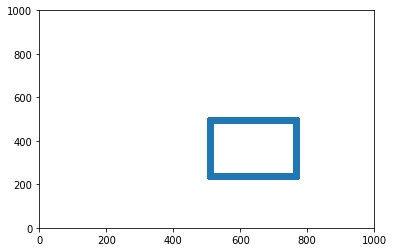

In [110]:
plt.scatter(projected_rectangle[0,:],projected_rectangle[1,:])
plt.xlim([0,1000])
plt.ylim([0,1000])
plt.show()

## Alternate the focal length

### We double the focal length

In [111]:
A = np.array([[2*F, 0, Cx,0],[0, 2*F, Cy,0],[0,0,1,0]])

In [112]:
projected_rectangle = np.dot(A,rectangle)
projected_rectangle = projected_rectangle[0:2,:]/projected_rectangle[2,1]

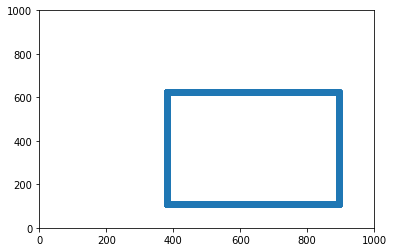

In [113]:
plt.scatter(projected_rectangle[0,:],projected_rectangle[1,:])
plt.xlim([0,1000])
plt.ylim([0,1000])
plt.show()

### We divide the focal length by two

In [114]:
A = np.array([[F/2, 0, Cx,0],[0, F/2, Cy,0],[0,0,1,0]])

In [115]:
projected_rectangle = np.dot(A,rectangle)
projected_rectangle = projected_rectangle[0:2,:]/projected_rectangle[2,1]

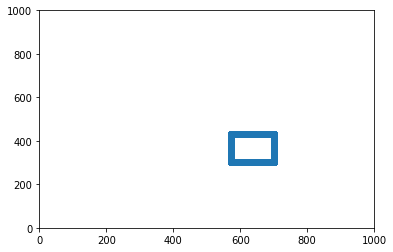

In [116]:
plt.scatter(projected_rectangle[0,:],projected_rectangle[1,:])
plt.xlim([0,1000])
plt.ylim([0,1000])
plt.show()

## Projection after changing of camera coordinates

In [124]:
R = np.array([[0.92387953, 0., 0.38268343],[0., 1., 0.],[-0.38268343, 0., 0.92387953]])
t = np.array([0.,0.,-0.2])

In [140]:
B = np.concatenate((np.transpose(R),-np.dot(np.transpose(R),t).reshape(3,1)),axis=1)

In [150]:
A = np.array([[F, 0, Cx],[0, F, Cy],[0,0,1]])

In [153]:
projected_cube = np.dot(np.dot(A,B),cube)
projected_cube = projected_cube[0:2,:]/projected_cube[2,:]

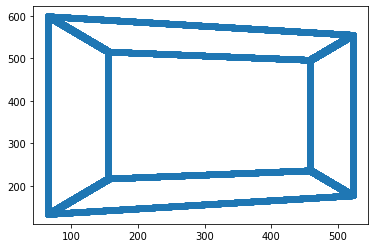

In [154]:
plt.scatter(projected_cube[0,:],projected_cube[1,:])
plt.show()